In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# 参数，分别是学习率，迭代次数，以及每50次迭代就打印一些东西
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [12]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]  # shape[0]读取矩阵第一维度的长度,得到 train_X 的列数


In [13]:
# tf.Graph Input
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Set model weights
W = tf.Variable(np.random.randn() , name = "weight")
b = tf.Variable(np.random.randn() , name = "bias")

In [14]:
# 构造一个线性模型
pred = tf.add(tf.multiply(X , W) , b)

In [15]:
# 均方误差
cost = tf.reduce_sum(tf.pow(pred - Y , 2)) / (2 * n_samples) 

#梯度下降
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [16]:
# 初始化全局变量
init = tf.global_variables_initializer()

Epoch: 0050 cost =  0.077906154 W =  0.23292848 b = 0.92135423
Epoch: 0100 cost =  0.077801913 W =  0.23391947 b = 0.91422486
Epoch: 0150 cost =  0.077709615 W =  0.23485164 b = 0.90751916
Epoch: 0200 cost =  0.077627875 W =  0.23572832 b = 0.901212
Epoch: 0250 cost =  0.077555500 W =  0.23655294 b = 0.8952801
Epoch: 0300 cost =  0.077491418 W =  0.23732843 b = 0.8897012
Epoch: 0350 cost =  0.077434674 W =  0.23805779 b = 0.88445425
Epoch: 0400 cost =  0.077384405 W =  0.23874384 b = 0.87951887
Epoch: 0450 cost =  0.077339888 W =  0.23938906 b = 0.874877
Epoch: 0500 cost =  0.077300437 W =  0.23999597 b = 0.87051094
Epoch: 0550 cost =  0.077265516 W =  0.24056673 b = 0.866405
Epoch: 0600 cost =  0.077234559 W =  0.24110365 b = 0.8625422
Epoch: 0650 cost =  0.077207133 W =  0.24160872 b = 0.8589092
Epoch: 0700 cost =  0.077182807 W =  0.24208368 b = 0.8554921
Epoch: 0750 cost =  0.077161275 W =  0.24253026 b = 0.8522795
Epoch: 0800 cost =  0.077142179 W =  0.24295045 b = 0.8492568
Epoch

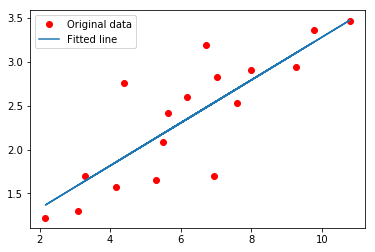

In [17]:
# 开始训练
with tf.Session() as sess:
    sess.run(init)
    
    # 输入全部的训练数据
    for epoch in range(training_epochs):
        for (x , y) in zip(train_X , train_Y):
            sess.run(optimizer , feed_dict = {X:x , Y:y})
        
        # 每次到了 display_step次迭代就显示当前的结果
        if (epoch + 1) % display_step == 0:
            # 这里是求出当前时刻对于全部样本的 cost 
            c = sess.run(cost , feed_dict = {X:train_X , Y:train_Y})
            # 这里是格式化， %04d 是保留小数点后4位，后面这个是保留小数点后9位
            print("Epoch:" , '%04d' % (epoch + 1) , "cost = " , "{:.9f}".format(c) , 
                 "W = " , sess.run(W) , "b =" , sess.run(b) )
    print("Optimization Finished")
    training_cost = sess.run(cost , feed_dict = {X:train_X , Y:train_Y})
    print("Training cost = " , training_cost , "W = " , sess.run(W) , "b = " , sess.run(b),'\n' )
    
    # 展示图像
    # 展示全部的点
    plt.plot(train_X , train_Y , 'ro' , label = 'Original data')
    # 展示拟合的直线
    plt.plot(train_X , sess.run(W) * train_X + sess.run(b) , label = 'Fitted line')
    # 增加标签
    plt.legend()
    plt.show()